In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import datetime
import time
import requests
import json
import dateutil.parser
import unicodedata
from dotenv import load_dotenv
from pytwitter import Api

# Load  ENV
load_dotenv()

# Set Alpaca API key and secret
# YOUR CODE HERE

twitter_api_key = os.getenv('twitter_api_key')
twitter_api_secret_key = os.getenv('twitter_api_secret_key')
bearer_token = Api(os.getenv('bearer_token'))

print(type(twitter_api_key))
print(type(twitter_api_secret_key))
print(type(bearer_token))

from datetime import datetime

def convert_id_to_date(idd):
    shifted = int(idd) >> 22
    timestamp=shifted+1288834974657
    time_created = datetime.fromtimestamp(timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')
    return time_created

start_time = "2022-04-08T23:52Z"
end_time = "2022-04-08T23:52Z"

<class 'str'>
<class 'str'>
<class 'pytwitter.api.Api'>


In [2]:
tweet_response_DOGE = bearer_token.search_tweets(query='DOGE', max_results=100)

DOGE_tweet_data = tweet_response_DOGE.data

for tweet in DOGE_tweet_data:
    print(tweet.text)
    print(convert_id_to_date(tweet.id))

RT @Kriptoabisi: 🚨ÇEKİLİŞ ZAMANI🚨

🏆1 kişiye 100$ $SOL (1550₺)

Kurallar:

1️⃣beni takip et
2️⃣RT&amp;♥️
3️⃣3 kişi etiket

⏰72 Saat

#Airdrop #…
2022-04-18 13:49:11
RT @_Adammayer: Happy Sunday guys ☀️

It is time to invest 🚨🚨
Shill me the next #x100Gem

#BSCGemsAlert  #bscgems #cryptocurrency #x100gems…
2022-04-18 13:49:10
RT @BackToTheDoge: hope everyone had a good easter kinder late with making something but happy easter doge fam 🙃 https://t.co/Qv0kAhULTL
2022-04-18 13:49:04
RT @dingdong290: @elonmusk #doge https://t.co/sJ1GLiPo4D
2022-04-18 13:49:02
7-day comparison of trending 🔥 #memecoins #cryptocurrencies

On this list: 
$SHAK @ShakitaInu #BlueSparrow #BabyDoge $doge #MarvinInu $kiba @KibaInuWorld 

It's ok for #SHAK 💪 the others should be green next week 👏👏

#CryptocurrencyNews #CMC @CoinMarketCap https://t.co/KJ2P6FBh5q
2022-04-18 13:49:02
RT @WRContest: 4 Avax $320 BIG Giveaway 🎁🔥

2 winners 4 #Avax 

🔴RT &amp; Like
🔴Follow @AvaxShop &amp; @altcryptomars
🔴Tag 3 friends

48h🕣


In [3]:
DOGE_df = pd.DataFrame(DOGE_tweet_data)
DOGE_df['id']=DOGE_df['id'].apply(lambda x: convert_id_to_date(x))
DOGE_df


,id,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,...,non_public_metrics,organic_metrics,possibly_sensitive,promoted_metrics,public_metrics,referenced_tweets,reply_settings,source,withheld,matching_rules
0,2022-04-18 13:49:11,RT @Kriptoabisi: 🚨ÇEKİLİŞ ZAMANI🚨\n\n🏆1 kişiye...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2022-04-18 13:49:10,RT @_Adammayer: Happy Sunday guys ☀️\n\nIt is ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2022-04-18 13:49:04,RT @BackToTheDoge: hope everyone had a good ea...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2022-04-18 13:49:02,RT @dingdong290: @elonmusk #doge https://t.co/...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2022-04-18 13:49:02,7-day comparison of trending 🔥 #memecoins #cry...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-04-18 13:46:03,@elonmusk @dhejack02 @Erdayastronaut La mejor ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
96,2022-04-18 13:46:02,"@tridoggg Maybe, but I guess some of us like T...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,2022-04-18 13:46:01,RT @babyhuskyinu: IF YOU HAVE MISSED DOGE DON'...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
98,2022-04-18 13:46:01,@AtomicHub @NFT_NYC hello people 👽! come and p...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
DOGE_df_text = DOGE_df. drop(labels=['attachments','author_id','context_annotations','conversation_id','created_at','entities','geo','in_reply_to_user_id','non_public_metrics','organic_metrics','possibly_sensitive',
                                   'promoted_metrics', 'public_metrics', 'referenced_tweets', 'reply_settings', 'source', 'withheld', 'matching_rules','lang'],
                                   axis=1)


""" DATA CLEANING AND ANALYSIS IMPORTS """

# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
DOGE_df_text['text'] = DOGE_df_text['text'].apply(lambda text: cleaning_stopwords(text))

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
DOGE_df_text['text']= DOGE_df_text['text'].apply(lambda x: cleaning_punctuations(x))

# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
DOGE_df_text['text'] = DOGE_df_text['text'].apply(lambda x: cleaning_repeating_char(x))

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
DOGE_df_text['text'] = DOGE_df_text['text'].apply(lambda x: cleaning_URLs(x))


# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

DOGE_df_text = DOGE_df_text.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in DOGE_df_text.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
DOGE_df_text = DOGE_df_text.join(text_sentiment_df)


from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# mystopwords = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'and', 'a']

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("u")
sw.append("it")
sw.append("!")
sw.append("(")
sw.append(")")
sw.append("/")
sw.append("/")
sw.append("-")


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

stopwords_expanded = ()

def tokenizer(text):
    
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
                          
    # Remove the punctuation from text 
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
             
    # Remove the stop words 
    output = [word for word in words if not word in sw]
    
    return output

# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

DOGE_df_text['token_text'] = DOGE_df_text.text.apply(tokenizer)
DOGE_df_text

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,text,text_compound,text_pos,text_neu,text_neg,text_sent,token_text
0,2022-04-18 13:49:11,RT Kriptoabisi EKL ZAMANI 1 kiiye100 SOL1550 K...,0.0000,0.000,1.000,0.000,0,"[RT, Kriptoabisi, EKL, ZAMANI, 1, kiiye100, SO..."
1,2022-04-18 13:49:10,RT Adammayer Happy Sunday guys It time invest...,0.5719,0.209,0.791,0.000,1,"[RT, Adammayer, Happy, Sunday, guy, It, time, ..."
2,2022-04-18 13:49:04,RT BackToTheDoge hope everyone good easter kin...,0.8765,0.479,0.521,0.000,1,"[RT, BackToTheDoge, hope, everyone, good, east..."
3,2022-04-18 13:49:02,RT dingdong290 elonmusk doge httpstcos1GLiPo4D,0.0000,0.000,1.000,0.000,0,"[RT, dingdong290, elonmusk, doge, httpstcos1GL..."
4,2022-04-18 13:49:02,7day comparison trending memecoins cryptocurr...,0.2960,0.081,0.919,0.000,1,"[7day, comparison, trending, memecoins, crypto..."
...,...,...,...,...,...,...,...,...
95,2022-04-18 13:46:03,elonmusk dhejack02 Erdayastronaut La mejor mem...,-0.5574,0.000,0.923,0.077,-1,"[elonmusk, dhejack02, Erdayastronaut, La, mejo..."
96,2022-04-18 13:46:02,tridoggg Maybe but I guess us like The Doge,0.5023,0.317,0.683,0.000,1,"[tridoggg, Maybe, I, guess, like, The, Doge]"
97,2022-04-18 13:46:01,RT babyhuskyinu IF YOU HAVE MISSED DOGE DONT M...,0.2701,0.186,0.705,0.109,1,"[RT, babyhuskyinu, IF, YOU, HAVE, MISSED, DOGE..."
98,2022-04-18 13:46:01,AtomicHub NFTNYC hello people come pick Doge ...,0.8807,0.349,0.651,0.000,1,"[AtomicHub, NFTNYC, hello, people, come, pick,..."


In [5]:
DOGE_df_text.to_csv("Results\generalpop_DOGE_sentiment_analysis_mostrecent2022.csv")

In [6]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
DOGE_df_text['text']= DOGE_df_text['text'].apply(lambda x: stemming_on_text(x))
DOGE_df_text['text'].head()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Generate the Bitcoin word cloud
# YOUR CODE HERE
token_text_df_DOGE = DOGE_df_text['token_text']
token_text_df_DOGE

DOGE_df_text = ' '.join(str(e) for e in token_text_df_DOGE)
DOGE_df_text

"['RT', 'Kriptoabisi', 'EKL', 'ZAMANI', '1', 'kiiye100', 'SOL1550', 'Kurallar1beni', 'takip', 'et', '2RTamp', '33', 'kii', 'etiket', '72', 'Saat', 'Airdrop'] ['RT', 'Adammayer', 'Happy', 'Sunday', 'guy', 'It', 'time', 'invest', 'Shill', 'next', '100Gem', 'BSCGemsAlert', 'bscgems', 'cryptocurrency', '100gems'] ['RT', 'BackToTheDoge', 'hope', 'everyone', 'good', 'easter', 'kinder', 'late', 'making', 'something', 'happy', 'easter', 'doge', 'fam', 'httpstcoQv0kAhULTL'] ['RT', 'dingdong290', 'elonmusk', 'doge', 'httpstcos1GLiPo4D'] ['7day', 'comparison', 'trending', 'memecoins', 'cryptocurrencies', 'On', 'list', 'SHAK', 'ShakitaInu', 'BlueSparrow', 'BabyDoge', 'doge', 'MarvinInu', 'kiba', 'KibaInuWorld', 'Its', 'ok', 'SHAK', 'others', 'green', 'next', 'week', 'CryptocurrencyNews', 'CMC', 'CoinMarketCap', 'httpstcoKJ2P6FBh5q'] ['RT', 'WRContest', '4', 'Avax', '320', 'BIG', 'Giveaway', '2', 'winner', '4', 'Avax', 'RT', 'amp', 'Like', 'Follow', 'AvaxShop', 'amp', 'altcryptomars', 'Tag', '3', '

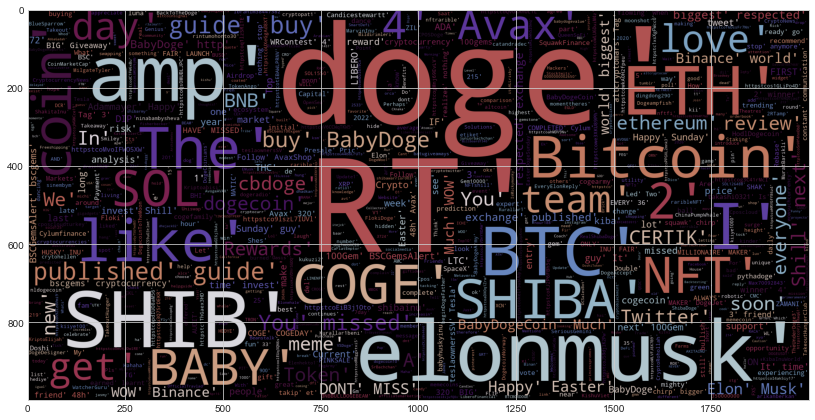

In [7]:
wc = WordCloud(max_words=1500,
                      max_font_size=350, random_state=42,
                      width=2000, height=1000,
                      colormap = "twilight" ).generate(DOGE_df_text)
plt.figure( figsize=(14,8))
plt.imshow(wc)

In [8]:
DOGE_price = Path("../../crypto_data/DOGEUSDT.csv")
DOGE_price = pd.read_csv(DOGE_price, encoding="utf-8-sig", header=[1])
DOGE_price = DOGE_price.drop(columns=['unix'])
DOGE_price

,date,symbol,open,high,low,close,Volume DOGE,Volume USDT,tradecount
0,2022-04-10 00:00:00,DOGE/USDT,0.144200,0.150900,0.143500,0.146700,175105644.0,2.582461e+07,31010
1,2022-04-09 23:00:00,DOGE/USDT,0.143600,0.144600,0.143200,0.144200,25770210.0,3.709464e+06,4119
2,2022-04-09 22:00:00,DOGE/USDT,0.143500,0.143700,0.143400,0.143600,6618994.0,9.503413e+05,2260
3,2022-04-09 21:00:00,DOGE/USDT,0.142700,0.143900,0.142700,0.143400,6687150.0,9.574298e+05,2580
4,2022-04-09 20:00:00,DOGE/USDT,0.143000,0.143800,0.142600,0.142600,10412792.0,1.492045e+06,2098
...,...,...,...,...,...,...,...,...,...
8358,2021-04-26 12:00:00,DOGE/USDT,0.267200,0.280951,0.264581,0.275625,514894840.0,1.409606e+08,226752
8359,2021-04-26 11:00:00,DOGE/USDT,0.263059,0.269039,0.263030,0.267204,213311206.0,5.682986e+07,101144
8360,2021-04-26 10:00:00,DOGE/USDT,0.265075,0.265839,0.261615,0.263039,146000700.0,3.854048e+07,70284
8361,2021-04-26 09:00:00,DOGE/USDT,0.262339,0.265676,0.259100,0.265070,191009014.0,5.011752e+07,100252


In [9]:
DOGE_tweets = Path("Resources_tweets/Tweets_Dogecoin.csv")
DOGE_tweets = pd.read_csv(DOGE_tweets, encoding="utf-8-sig")
DOGE_tweets = DOGE_tweets.drop(columns=['urls','replies_count','retweets_count','likes_count','urls','mentions','photos','video','cashtags','photos','reply_to','thumbnail'])
DOGE_tweets

,date,time,timezone,username,name,tweet,language,hashtags
0,20-04-2021,17:57:09,530,sunnyepposo,congrats ✨,I invested $16k a couple of weeks ago when a l...,en,"['dogeday420', 'dogeday', 'doge420', 'dogecoin']"
1,20-04-2021,17:57:07,530,pickndng,andrea || busy sa exams at pts kuno🍀✨,Bought in for $16k. My #dogecoin will make me ...,en,"['dogecoin', 'doge', 'dogeday']"
2,20-04-2021,17:57:07,530,s4y4n9_semu4,#SayangiSemesta,I invested $16k a couple of weeks ago when a l...,en,"['dogeday420', 'dogeday', 'doge420', 'dogecoin']"
3,20-04-2021,17:57:06,530,dogecoinsky,dogecoinsky,"looking back in 2010/11, BTC had low value, hi...",en,"['dogecoin', 'dogeday', 'dogecoinsky']"
4,20-04-2021,17:57:04,530,dogeman0401,jay,Looks like the hype of today isn’t coming to f...,en,"['doge420', 'dogeday420', 'doge', 'dogecoin']"
...,...,...,...,...,...,...,...,...
250004,16-04-2021,06:01:13,530,rwied44,OutToLunch,#dogecoin reaches $0.20! https://t.co/yBkUBC3xRI,en,['dogecoin']
250005,16-04-2021,06:01:12,530,rtx933,rtx933,#dogecoin #LATOKEN https://t.co/CiR47MT9Qz,und,"['dogecoin', 'latoken']"
250006,16-04-2021,06:01:12,530,grababagceo,Brandon Jones,#dogecoin community is unlike any on the plane...,en,"['dogecoin', 'moon', 'tesla', 'dogecointo1doll..."
250007,16-04-2021,06:01:11,530,rizedogecoin,DogecoinRizing 🌏🌙🌖,Doge Prediction: Up #dogecoin,en,['dogecoin']


In [10]:
DOGE_tweets.dtypes

date        object
time        object
timezone     int64
username    object
name        object
tweet       object
language    object
hashtags    object
dtype: object

In [11]:
# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
DOGE_tweets['tweet'] = DOGE_tweets['tweet'].apply(lambda text: cleaning_stopwords(text))

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
DOGE_tweets['tweet']= DOGE_tweets['tweet'].apply(lambda x: cleaning_punctuations(x))

# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
DOGE_tweets['tweet'] = DOGE_tweets['tweet'].apply(lambda x: cleaning_repeating_char(x))

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
DOGE_tweets['tweet'] = DOGE_tweets['tweet'].apply(lambda x: cleaning_URLs(x))


# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

DOGE_tweets = DOGE_tweets.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in DOGE_tweets.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["tweet"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
DOGE_tweets = DOGE_tweets.join(text_sentiment_df)

In [12]:
DOGE_tweets

,date,time,timezone,username,name,tweet,language,hashtags,text_compound,text_pos,text_neu,text_neg,text_sent
0,20-04-2021,17:57:09,530,sunnyepposo,congrats,I invested16k couple weeks ago large trading g...,en,"['dogeday420', 'dogeday', 'doge420', 'dogecoin']",0.0000,0.000,1.000,0.000,0
1,20-04-2021,17:57:07,530,pickndng,andrea || busy sa exams at pts kuno,Bought16k My dogecoin make millionaire Especia...,en,"['dogecoin', 'doge', 'dogeday']",-0.4019,0.000,0.881,0.119,-1
2,20-04-2021,17:57:07,530,s4y4n9_semu4,#SayangiSemesta,I invested16k couple weeks ago large trading g...,en,"['dogeday420', 'dogeday', 'doge420', 'dogecoin']",0.0000,0.000,1.000,0.000,0
3,20-04-2021,17:57:06,530,dogecoinsky,dogecoinsky,looking back 211 BTC low value high distrust h...,en,"['dogecoin', 'dogeday', 'dogecoinsky']",0.5023,0.149,0.760,0.090,1
4,20-04-2021,17:57:04,530,dogeman0401,jay,Looks like hype today isnt coming fruition dog...,en,"['doge420', 'dogeday420', 'doge', 'dogecoin']",0.3612,0.200,0.800,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250004,16-04-2021,06:01:13,530,rwied44,OutToLunch,dogecoin reaches 020 httpstcoyBkUBC3xRI,en,['dogecoin'],0.0516,0.286,0.714,0.000,1
250005,16-04-2021,06:01:12,530,rtx933,rtx933,dogecoin LATOKEN httpstcoCiR47MT9Qz,und,"['dogecoin', 'latoken']",0.0000,0.000,1.000,0.000,0
250006,16-04-2021,06:01:12,530,grababagceo,Brandon Jones,dogecoin community unlike planet Thats were he...,en,"['dogecoin', 'moon', 'tesla', 'dogecointo1doll...",0.0000,0.000,1.000,0.000,0
250007,16-04-2021,06:01:11,530,rizedogecoin,DogecoinRizing,Doge Prediction Up dogecoin,en,['dogecoin'],0.0000,0.000,1.000,0.000,0


In [13]:
DOGE_tweets['text_sent'] = DOGE_tweets['text_sent'].replace(-1,0)

In [30]:
print(DOGE_tweets['text_sent'].unique())
print(DOGE_tweets.info())

[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250009 entries, 0 to 250008
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           250009 non-null  object 
 1   time           250009 non-null  object 
 2   timezone       250009 non-null  object 
 3   username       250009 non-null  object 
 4   name           250009 non-null  object 
 5   tweet          250009 non-null  object 
 6   language       250009 non-null  object 
 7   hashtags       250009 non-null  object 
 8   text_compound  250009 non-null  float64
 9   text_pos       250009 non-null  float64
 10  text_neu       250009 non-null  float64
 11  text_neg       250009 non-null  float64
 12  text_sent      250009 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 24.8+ MB
None


In [15]:
DOGE_tweets

,date,time,timezone,username,name,tweet,language,hashtags,text_compound,text_pos,text_neu,text_neg,text_sent
0,20-04-2021,17:57:09,530,sunnyepposo,congrats,I invested16k couple weeks ago large trading g...,en,"['dogeday420', 'dogeday', 'doge420', 'dogecoin']",0.0000,0.000,1.000,0.000,0
1,20-04-2021,17:57:07,530,pickndng,andrea || busy sa exams at pts kuno,Bought16k My dogecoin make millionaire Especia...,en,"['dogecoin', 'doge', 'dogeday']",-0.4019,0.000,0.881,0.119,0
2,20-04-2021,17:57:07,530,s4y4n9_semu4,#SayangiSemesta,I invested16k couple weeks ago large trading g...,en,"['dogeday420', 'dogeday', 'doge420', 'dogecoin']",0.0000,0.000,1.000,0.000,0
3,20-04-2021,17:57:06,530,dogecoinsky,dogecoinsky,looking back 211 BTC low value high distrust h...,en,"['dogecoin', 'dogeday', 'dogecoinsky']",0.5023,0.149,0.760,0.090,1
4,20-04-2021,17:57:04,530,dogeman0401,jay,Looks like hype today isnt coming fruition dog...,en,"['doge420', 'dogeday420', 'doge', 'dogecoin']",0.3612,0.200,0.800,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250004,16-04-2021,06:01:13,530,rwied44,OutToLunch,dogecoin reaches 020 httpstcoyBkUBC3xRI,en,['dogecoin'],0.0516,0.286,0.714,0.000,1
250005,16-04-2021,06:01:12,530,rtx933,rtx933,dogecoin LATOKEN httpstcoCiR47MT9Qz,und,"['dogecoin', 'latoken']",0.0000,0.000,1.000,0.000,0
250006,16-04-2021,06:01:12,530,grababagceo,Brandon Jones,dogecoin community unlike planet Thats were he...,en,"['dogecoin', 'moon', 'tesla', 'dogecointo1doll...",0.0000,0.000,1.000,0.000,0
250007,16-04-2021,06:01:11,530,rizedogecoin,DogecoinRizing,Doge Prediction Up dogecoin,en,['dogecoin'],0.0000,0.000,1.000,0.000,0


In [17]:
""" SAVE AS CSV """ 

# DOGE_tweets.to_csv("Results\generalpop_DOGE_sentiment_analysis_bigdataset.csv")

' SAVE AS CSV '

KeyError: 'text'

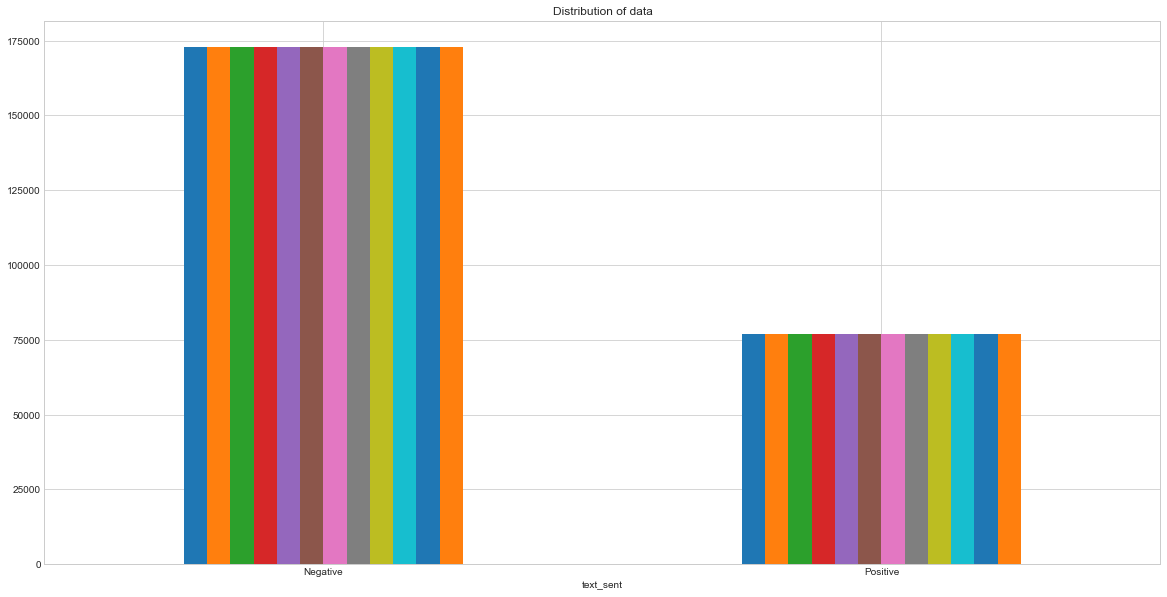

In [18]:
# Plotting the distribution for dataset.
ax = DOGE_tweets.groupby('text_sent').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(DOGE_tweets['text']), list(DOGE_tweets['text_sent'])
plt.rcParams.update({'font.size': 20})

In [ ]:
DOGE_tweets['date'].value_counts()

In [19]:
X=DOGE_tweets.tweet
y=DOGE_tweets.text_sent

In [20]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [21]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


C:\Users\antho\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [23]:
# Model-1

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg  ','False Pos  ', 'False Neg  ','True Pos  ']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':16}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':16}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.rcParams.update({'font.size': 20})

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8714
           1       0.83      0.67      0.75      3787

    accuracy                           0.86     12501
   macro avg       0.85      0.81      0.82     12501
weighted avg       0.86      0.86      0.86     12501



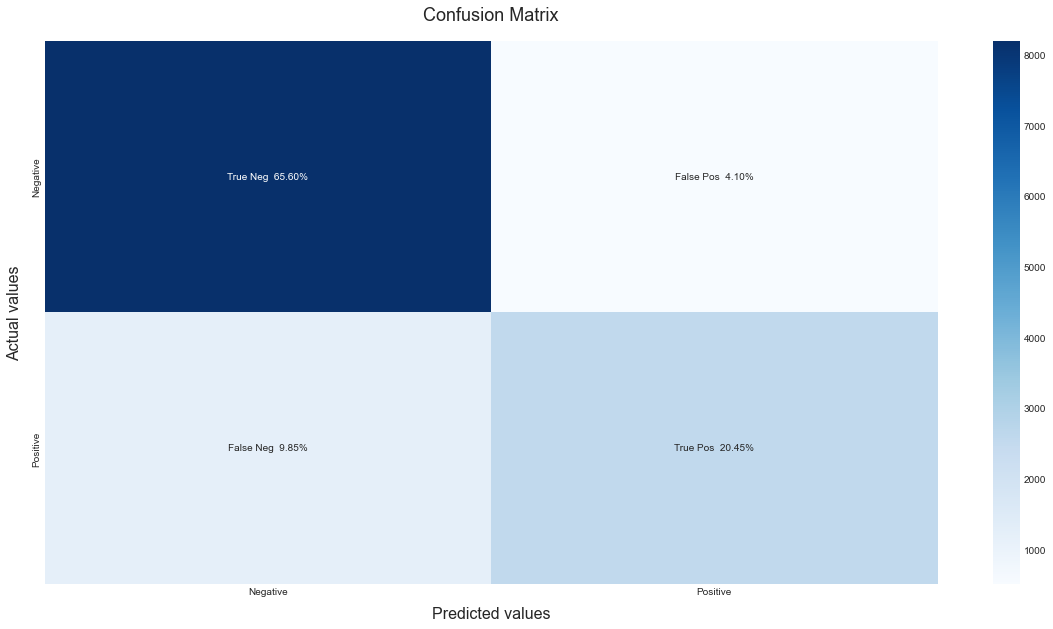

In [24]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

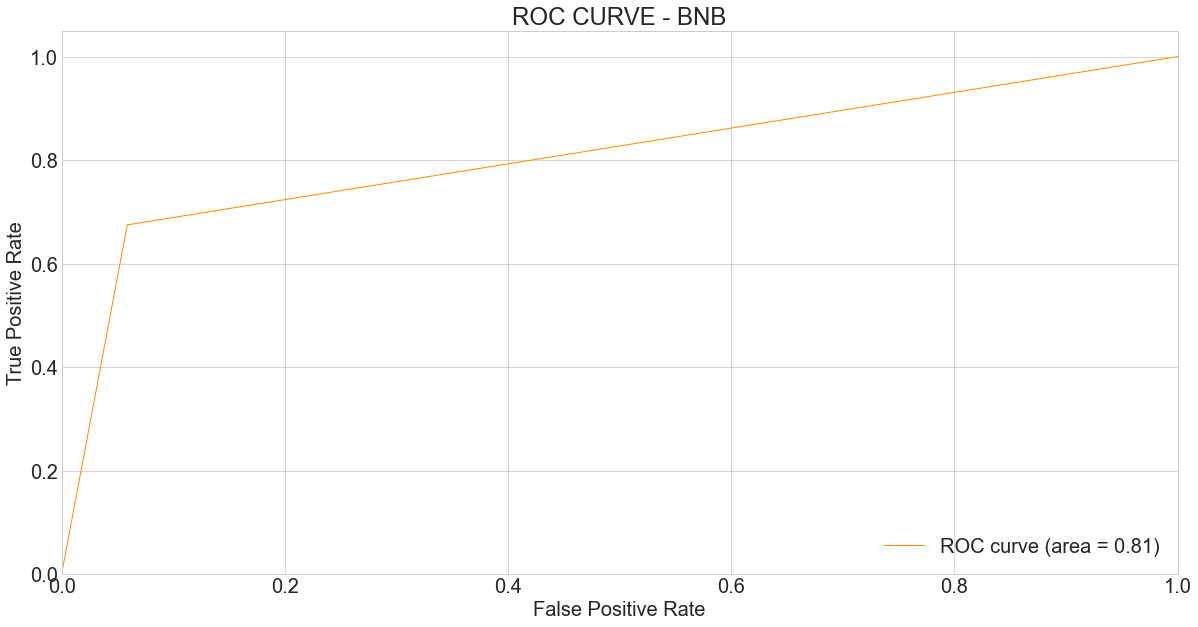

In [25]:
# Plot the ROC-AUC Curve for model-1

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE - BNB')
plt.legend(loc="lower right")
plt.rcParams.update({'font.size': 20})
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8714
           1       0.94      0.94      0.94      3787

    accuracy                           0.96     12501
   macro avg       0.96      0.96      0.96     12501
weighted avg       0.96      0.96      0.96     12501



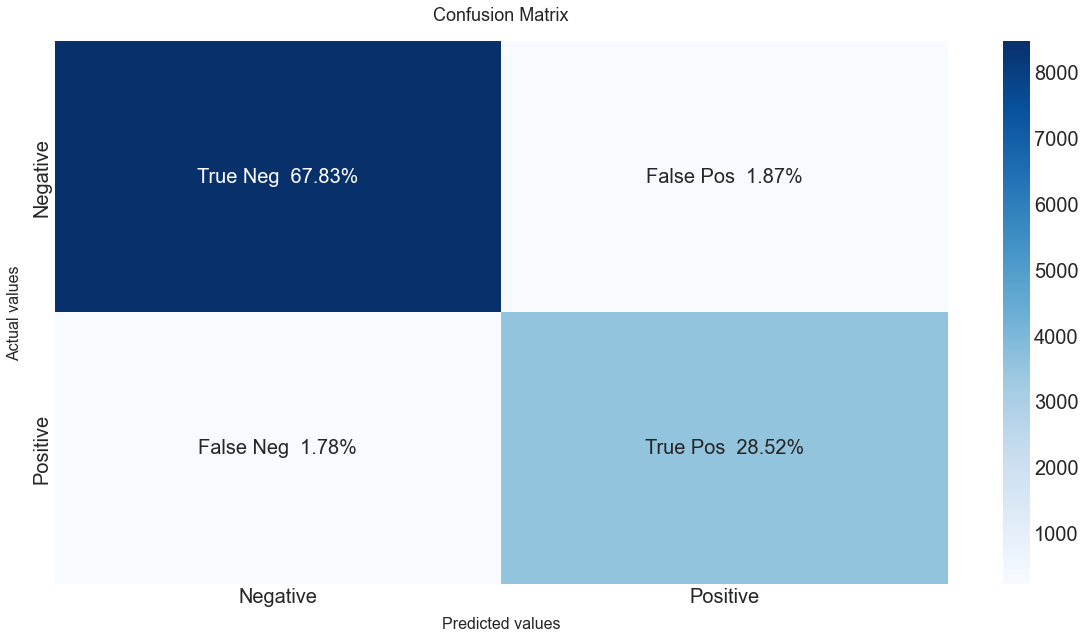

In [26]:
# Model 2 

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
plt.title('ROC CURVE - SVC Model')
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

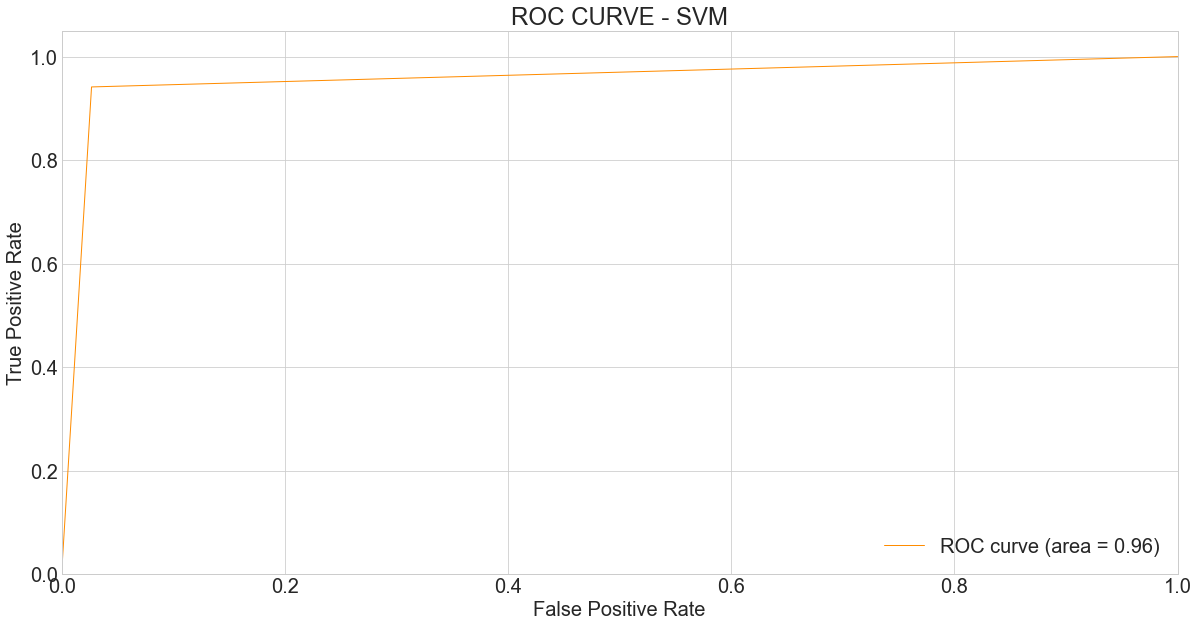

In [27]:
# Plot the ROC-AUC Curve for model-2

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE - SVM')
plt.legend(loc="lower right")
plt.rcParams.update({'font.size': 20})
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8714
           1       0.94      0.90      0.92      3787

    accuracy                           0.95     12501
   macro avg       0.95      0.94      0.94     12501
weighted avg       0.95      0.95      0.95     12501



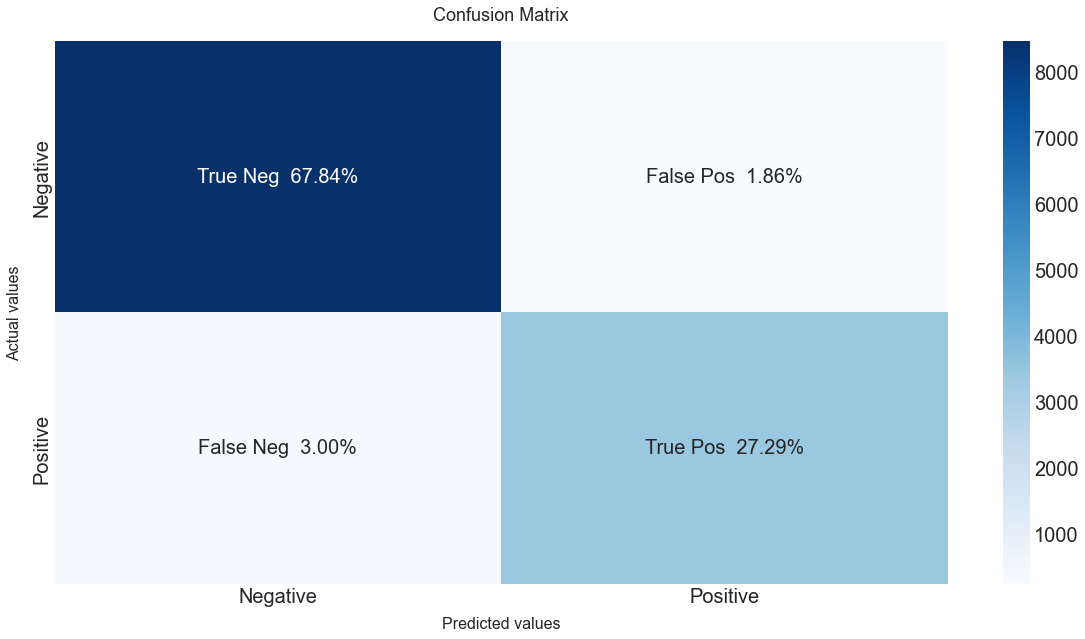

In [28]:
# Model-3

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

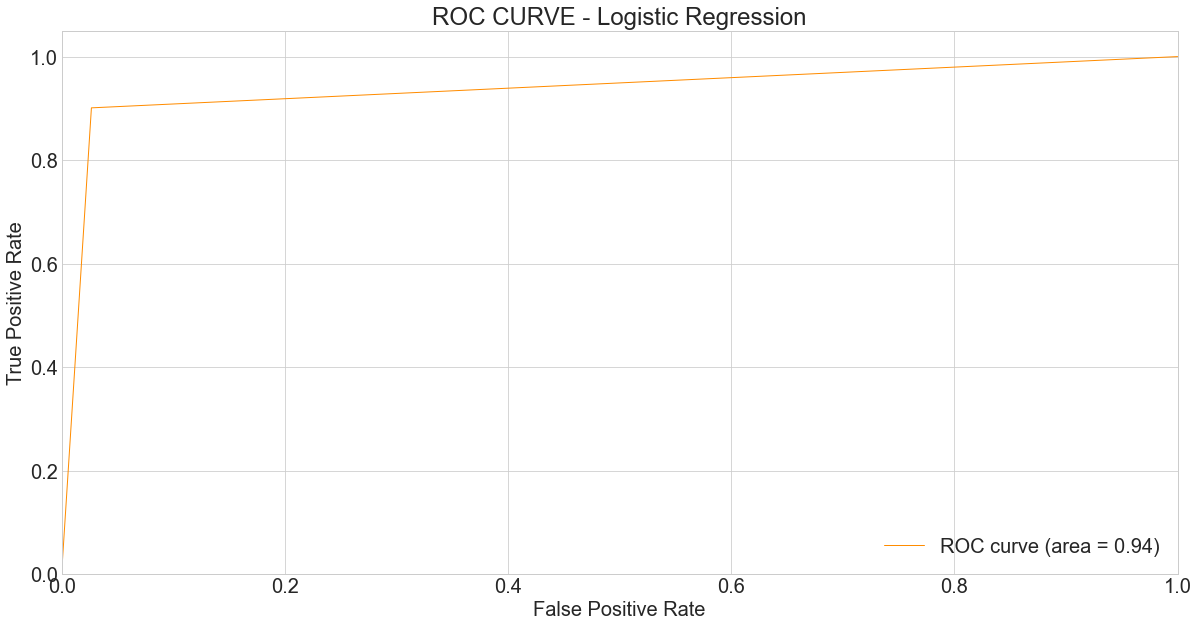

In [29]:
# Plot the ROC-AUC Curve for model-3

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE - Logistic Regression')
plt.legend(loc="lower right")
plt.rcParams.update({'font.size': 20})
plt.show()